DSC630-T302: Brandon Mather - Week 4 assignment

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn.decomposition import PCA

In [2]:
als_data = pd.read_csv('als_data.csv')

In [3]:
als_data

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,1,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,...,143.0,0.017422,533,8,7.0,7,0.002646,6.00,6.0,6.0
1,2,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,...,136.0,0.010453,649,8,7.0,5,0.005386,7.00,5.0,5.0
2,3,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,...,140.0,0.008929,1234,5,0.0,0,0.008929,6.00,5.0,5.0
3,4,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,...,138.0,0.012469,2492,5,5.0,3,0.004988,7.00,6.0,5.0
4,5,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,...,138.0,0.008292,2956,6,4.0,1,0.008489,6.00,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218,2419,33,50.0,49.0,45.0,0.008772,-0.239501,35,32.5,30,...,136.0,0.014035,997136,7,5.0,5,0.003643,7.00,6.0,5.0
2219,2420,61,47.0,45.0,42.0,0.009074,-0.388711,31,26.0,17,...,141.0,0.009074,998047,5,4.0,3,0.003630,7.41,5.5,5.0
2220,2421,47,46.0,44.0,41.0,0.012111,-0.108631,26,23.0,20,...,135.0,0.013123,998773,5,4.0,4,0.001825,9.00,6.0,5.0
2221,2422,37,49.0,44.0,39.0,0.017857,-0.855880,34,29.5,21,...,136.0,0.007143,998908,8,4.5,2,0.010714,6.00,5.0,5.0


1) Remove any data that is not relevant to the patient’s ALS condition.

In [4]:
to_drop = ['ID', 'SubjectID']

In [5]:
als_data.drop(to_drop, inplace = True, axis = 1)

In [6]:
als_data

,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,...,Sodium_median,Sodium_min,Sodium_range,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,0.021164,...,145.5,143.0,0.017422,8,7.0,7,0.002646,6.00,6.0,6.0
1,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,0.028725,...,138.0,136.0,0.010453,8,7.0,5,0.005386,7.00,5.0,5.0
2,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,0.025000,...,143.0,140.0,0.008929,5,0.0,0,0.008929,6.00,5.0,5.0
3,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,0.014963,...,139.0,138.0,0.012469,5,5.0,3,0.004988,7.00,6.0,5.0
4,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,0.020374,...,140.0,138.0,0.008292,6,4.0,1,0.008489,6.00,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218,33,50.0,49.0,45.0,0.008772,-0.239501,35,32.5,30,0.009107,...,141.0,136.0,0.014035,7,5.0,5,0.003643,7.00,6.0,5.0
2219,61,47.0,45.0,42.0,0.009074,-0.388711,31,26.0,17,0.025408,...,143.0,141.0,0.009074,5,4.0,3,0.003630,7.41,5.5,5.0
2220,47,46.0,44.0,41.0,0.012111,-0.108631,26,23.0,20,0.010949,...,141.0,135.0,0.013123,5,4.0,4,0.001825,9.00,6.0,5.0
2221,37,49.0,44.0,39.0,0.017857,-0.855880,34,29.5,21,0.023214,...,139.0,136.0,0.007143,8,4.5,2,0.010714,6.00,5.0,5.0


2) Apply a standard scalar to the data.

In [7]:
scaler = StandardScaler()

In [8]:
standardized = scaler.fit_transform(als_data)

3)Create a plot of the cluster silhouette score versus the number of clusters in a K-means cluster.

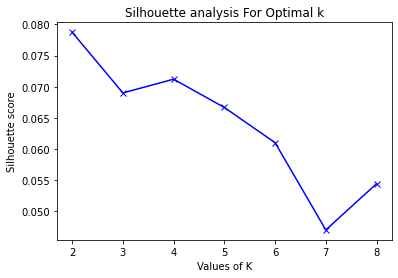

In [9]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(standardized)
 cluster_labels = kmeans.labels_
 silhouette_avg.append(silhouette_score(standardized, cluster_labels)) 
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

4) Use the plot created in (3) to choose an optimal number of clusters for K-means. Justify your choice.

The optimal number of clusters for K-means would be 2 since that is where the silhouette score is maximized. 

5) Fit a K-means model to the data with the optimal number of clusters chosen in part (4).

In [10]:
kmeans = KMeans(n_clusters=2).fit(standardized)

6) Fit a PCA transformation with two features to the scaled data.

In [21]:
pca=PCA(n_components=2)


In [26]:
pca_feature = pca.fit_transform(standardized)

7) Make a scatterplot of the PCA transformed data coloring each point by its cluster value.

In [27]:
pca_df = pd.DataFrame(
    data=pca_feature, 
    columns=['PC1', 'PC2'])

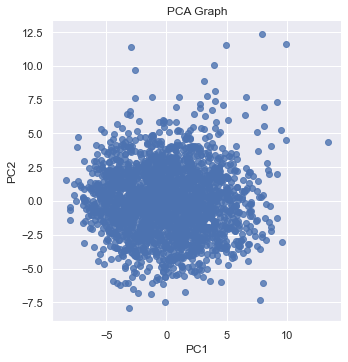

In [31]:
sns.set()
 
sns.lmplot(
    x='PC1', 
    y='PC2', 
    data=pca_df,
    fit_reg=False, 
    legend=True
    )
 
plt.title('PCA Graph')
plt.show()

8) Summarize your results and make a conclusion.